# Data Extraction Form - Research Question 5 (RQ5)
## What type of experiments are used to assess VM consolidation solutions?

This notebook analyses the collected data to answer the RQ5.

In [1]:
from utils import *

## 2. Reading information related to the experiment

Uses the utils module to load the information related to the experiment.

In [2]:
scenario_df = DataExtraction().get_scenario()

pm_scenario = create_unified_dictionary(scenario_df[DataExtraction.SCENARIO_PMS])
vm_scenario = create_unified_dictionary(scenario_df[DataExtraction.SCENARIO_VMS])

total_papers = len(scenario_df)

## 3. Ploting the bar charts
Firstly, we count the occurrences of type and platform of experiences that have been used by papers.  
Then, we plot horizontal bar charts for this data containing absolute and relative amounts.  

### 3.1. Ploting the dataset bar chart


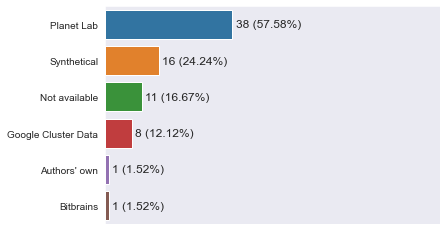

In [3]:
dataset_series = scenario_df[DataExtraction.SCENARIO_DATASET]

dataset_series = (dataset_series.str.split('+')
                                .explode()
                                .str.strip()
                                .value_counts()
                                .reset_index()
                                .rename(columns={Table.INDEX: DataExtraction.SCENARIO_DATASET, DataExtraction.SCENARIO_DATASET: Table.AMOUNT}))

plot_horizontal_bar_chart(x=Table.AMOUNT, 
                          y=DataExtraction.SCENARIO_DATASET, 
                          data=dataset_series, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-Dataset.pdf')

### 3.2. Ploting the amount of PMs bar chart


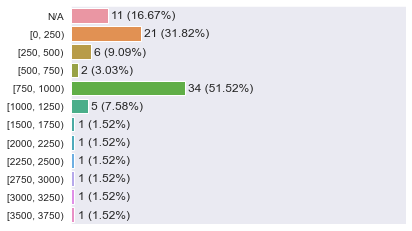

In [4]:
pm_amount = count_occurrences_in_bins(scenario_df[DataExtraction.SCENARIO_PMS], 
                                      pm_scenario, 
                                      PMScenario.AMOUNT, 
                                      250)

plot_horizontal_bar_chart(pm_amount, 
                          x=Scenario.OCCURRENCES, 
                          y=Scenario.BINS, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-PM-Amount.pdf')

### 3.3. Ploting the amount of PM types bar chart


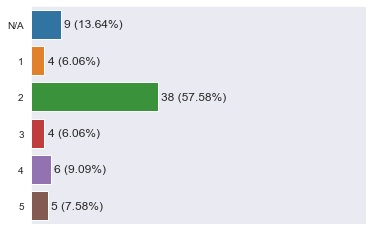

In [5]:
plot_horizontal_bar_chart(y=PMScenario.TYPES, 
                          x=Scenario.OCCURRENCES, 
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-PM-Types.pdf',
                          data=pd.Series(pm_scenario[PMScenario.TYPES])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.TYPES, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=PMScenario.TYPES)
                                 .replace(-1, Scenario.NA))

### 3.4. Ploting the distribution of PMs bar chart


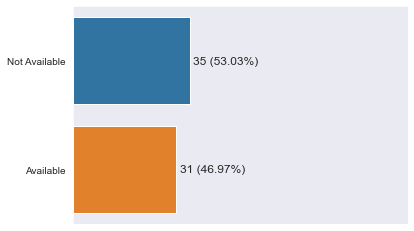

In [6]:
plot_horizontal_bar_chart(y=PMScenario.DISTRIBUTION, 
                          x=Scenario.OCCURRENCES, 
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-PM-Distribution.pdf',
                          data=pd.Series(pm_scenario[PMScenario.DISTRIBUTION])
                                 .replace(-1, Scenario.NOT_AVAILABLE)
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.DISTRIBUTION, 0: Scenario.OCCURRENCES}))

### 3.5. Ploting the number of CPU cores of PMs bar chart


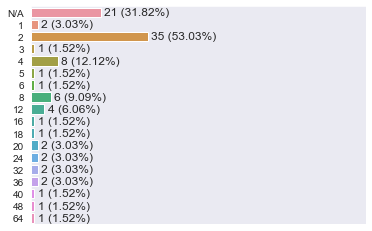

In [7]:
plot_horizontal_bar_chart(y=PMScenario.CORES, x=Scenario.OCCURRENCES, 
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-PM-Cores.pdf',
                          data=pd.Series(pm_scenario[PMScenario.CORES])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.CORES, 0: Scenario.OCCURRENCES})
                                 .replace(Scenario.NOT_AVAILABLE, -1)
                                 .sort_values(by=PMScenario.CORES)
                                 .replace(-1, Scenario.NA))

### 3.6. Ploting the CPU frequency (MIPS) of PMs bar chart


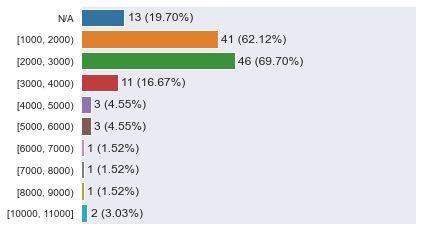

In [8]:
pm_frequency = count_occurrences_in_bins(scenario_df[DataExtraction.SCENARIO_PMS],
                                         pm_scenario, 
                                         PMScenario.FREQUENCY, 
                                         1_000)

plot_horizontal_bar_chart(pm_frequency, 
                          x=Scenario.OCCURRENCES, 
                          y=Scenario.BINS, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-PM-Frequency.pdf')

### 3.7. Ploting the RAM (GB) of PMs bar chart


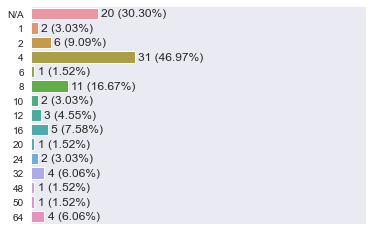

In [9]:
plot_horizontal_bar_chart(x=Scenario.OCCURRENCES, 
                          y=PMScenario.RAM, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-PM-RAM.pdf',
                          remove_decimals=True,
                          data=pd.Series(pm_scenario[PMScenario.RAM])
                                 .round()
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.RAM, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=PMScenario.RAM)
                                 .replace(-1, Scenario.NA))

### 3.8. Ploting the storage (GB) of PMs bar chart

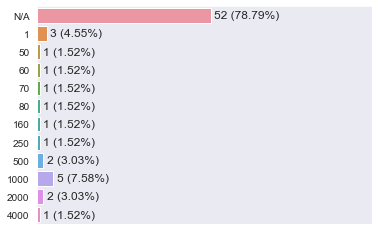

In [10]:
plot_horizontal_bar_chart(x=Scenario.OCCURRENCES, 
                          y=PMScenario.STORAGE, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-PM-Storage.pdf',
                          remove_decimals=True,
                          data=pd.Series(pm_scenario[PMScenario.STORAGE])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.STORAGE, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=PMScenario.STORAGE)
                                 .replace(-1, Scenario.NA))

### 3.9. Ploting the bandwidth (Gbps) of PMs bar chart


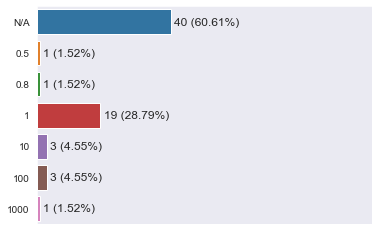

In [11]:
plot_horizontal_bar_chart(x=Scenario.OCCURRENCES, 
                          y=PMScenario.BANDWIDTH, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-PM-Bandwidth.pdf',
                          remove_decimals=True,
                          data=pd.Series(pm_scenario[PMScenario.BANDWIDTH])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: PMScenario.BANDWIDTH, 0: Scenario.OCCURRENCES})
                                 .replace(Scenario.NOT_AVAILABLE, -1)
                                 .sort_values(by=PMScenario.BANDWIDTH)
                                 .replace(-1, Scenario.NA))

### 3.10. Ploting the amount of VM bar chart


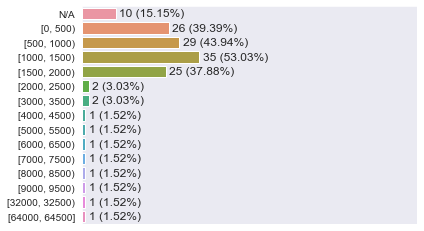

In [12]:
vm_amount = count_occurrences_in_bins(scenario_df[DataExtraction.SCENARIO_VMS], 
                                      vm_scenario, 
                                      VMScenario.AMOUNT, 
                                      500)

plot_horizontal_bar_chart(vm_amount, 
                          x=Scenario.OCCURRENCES, 
                          y=Scenario.BINS, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-VM-Amount.pdf')

### 3.11. Ploting the amount of VM types bar chart

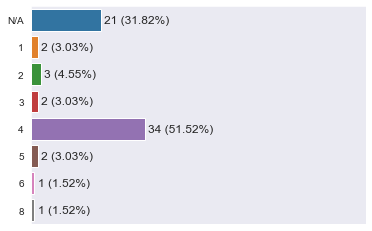

In [13]:
plot_horizontal_bar_chart(x=VMScenario.OCCURRENCES,
                          y=VMScenario.TYPES,
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-VM-Types.pdf',
                          data=pd.Series(vm_scenario[VMScenario.TYPES])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={VMScenario.INDEX: VMScenario.TYPES, 0: VMScenario.OCCURRENCES})
                                 .sort_values(by=VMScenario.TYPES)
                                 .replace(-1, VMScenario.NA))

### 3.12. Ploting the distribution of VMs bar chart


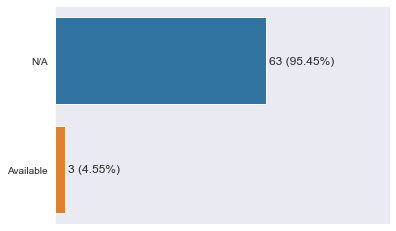

In [14]:
plot_horizontal_bar_chart(x=VMScenario.OCCURRENCES,
                          y=VMScenario.DISTRIBUTION,
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-VM-Distribution.pdf',
                          data=pd.Series(vm_scenario[VMScenario.DISTRIBUTION])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={VMScenario.INDEX: VMScenario.DISTRIBUTION, 0: VMScenario.OCCURRENCES})
                                 .replace(-1, VMScenario.NA))


### 3.13. Ploting the number of CPU cores of VMs bar chart

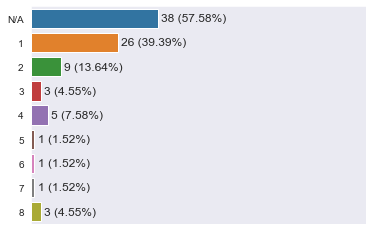

In [15]:
plot_horizontal_bar_chart(y=VMScenario.CORES, x=Scenario.OCCURRENCES, 
                          xlim=(0, 100),
                          total=66,
                          filename='RQ5-VM-Cores.pdf',
                          data=pd.Series(vm_scenario[VMScenario.CORES])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: VMScenario.CORES, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=VMScenario.CORES)
                                 .replace(-1, Scenario.NA))

### 3.14. Ploting the CPU frequency (MIPS) of VMs bar chart


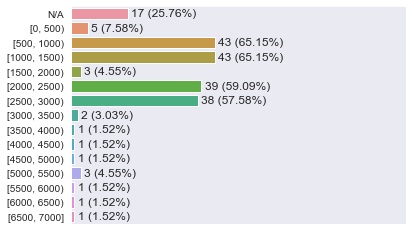

In [16]:
vm_frequency = count_occurrences_in_bins(scenario_df[DataExtraction.SCENARIO_VMS], 
                                      vm_scenario, 
                                      VMScenario.FREQUENCY, 
                                      500)

plot_horizontal_bar_chart(vm_frequency, 
                          x=Scenario.OCCURRENCES, 
                          y=Scenario.BINS, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-VM-Frequency.pdf')

### 3.15. Ploting the RAM (MB) of VMs bar chart

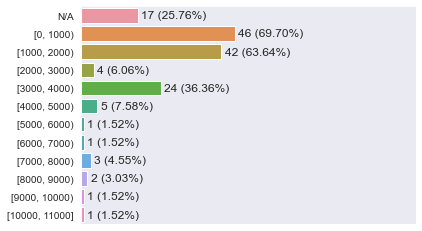

In [17]:
vm_ram = count_occurrences_in_bins(scenario_df[DataExtraction.SCENARIO_VMS], 
                                      vm_scenario, 
                                      VMScenario.RAM, 
                                      1_000)


plot_horizontal_bar_chart(vm_ram, 
                          x=Scenario.OCCURRENCES, 
                          y=Scenario.BINS, 
                          xlim=(0, 100), 
                          total=total_papers, 
                          filename='RQ5-VM-RAM.pdf')

### 3.16. Ploting the storage (GB) of VMs bar chart


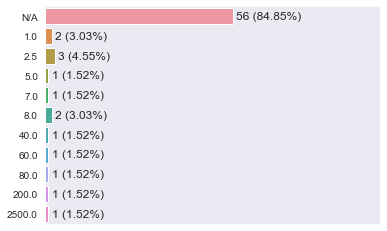

In [18]:
plot_horizontal_bar_chart(x=VMScenario.OCCURRENCES,
                          y=VMScenario.STORAGE,
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-VM-Storage.pdf',
                          data=pd.Series(vm_scenario[VMScenario.STORAGE])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: VMScenario.STORAGE, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=VMScenario.STORAGE)
                                 .replace(-1, Scenario.NA))

### 3.17. Ploting the bandwidth (Mbps) of VMs bar chart


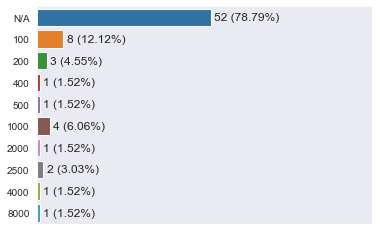

In [19]:
plot_horizontal_bar_chart(x=VMScenario.OCCURRENCES,
                          y=VMScenario.BANDWIDTH,
                          xlim=(0, 100),
                          total=total_papers,
                          filename='RQ5-VM-Bandwidth.pdf',
                          data=pd.Series(vm_scenario[VMScenario.BANDWIDTH])
                                 .value_counts()
                                 .reset_index()
                                 .rename(columns={Scenario.INDEX: VMScenario.BANDWIDTH, 0: Scenario.OCCURRENCES})
                                 .sort_values(by=VMScenario.BANDWIDTH)
                                 .replace(-1, Scenario.NA))